In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/Users/deepak/Programs/ML/pre-ownedcars.csv')

In [3]:
print("\nStatistical Summary:")
print(data.describe())


Statistical Summary:
         make_year  engine_capacity(CC)      km_driven         price  \
count  2805.000000          2688.000000    2805.000000  2.806000e+03   
mean   2018.181105          1259.027530   49215.477362  1.342522e+06   
std       2.945293           254.504798   26626.932696  3.554669e+07   
min    2010.000000           624.000000     450.000000  1.630000e+05   
25%    2016.000000          1194.000000   28540.000000  4.350000e+05   
50%    2018.000000          1197.000000   45695.000000  5.940000e+05   
75%    2021.000000          1462.000000   68182.000000  8.140000e+05   
max    2024.000000          2694.000000  143991.000000  1.883558e+09   

       overall_cost  
count   2805.000000  
mean   13495.022816  
std     6040.809220  
min     4039.000000  
25%     9267.000000  
50%    12145.000000  
75%    15760.000000  
max    47338.000000  


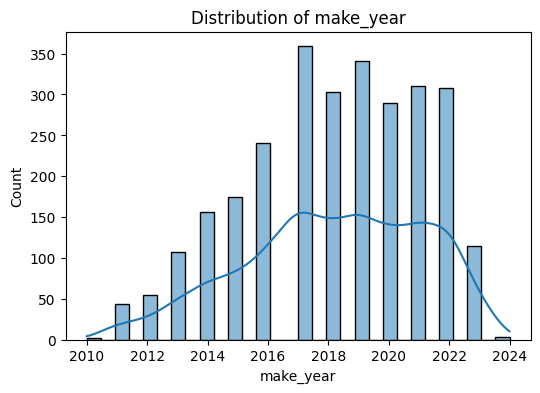

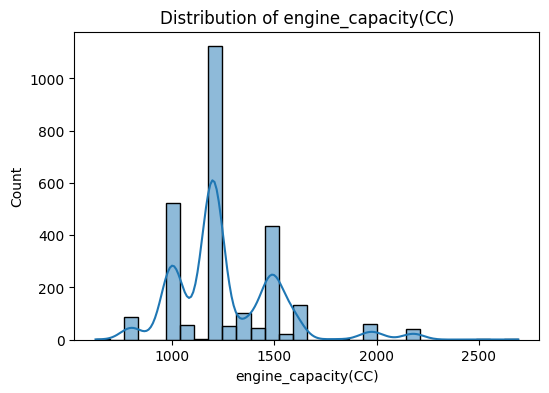

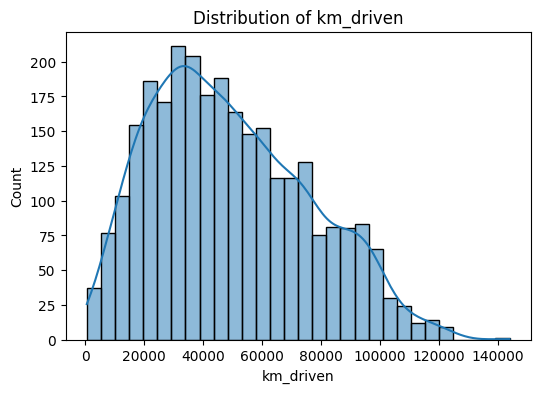

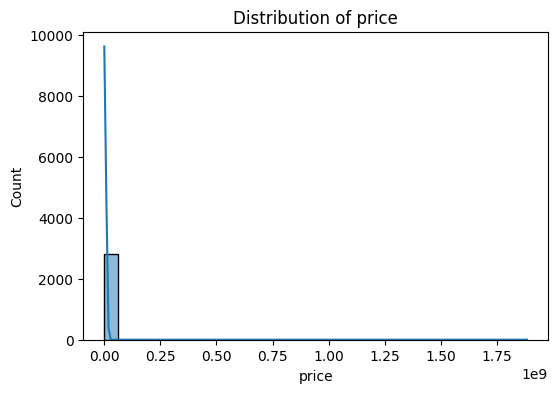

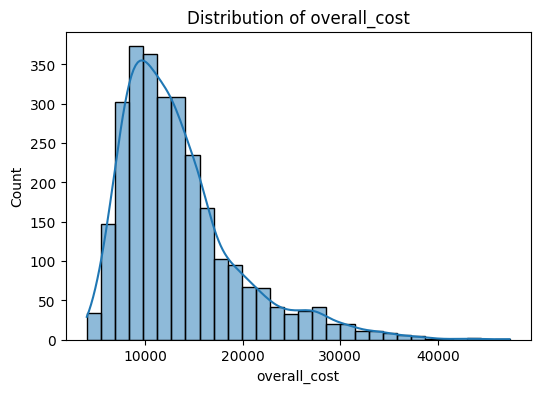

In [5]:
#distribution of numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns.tolist()
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

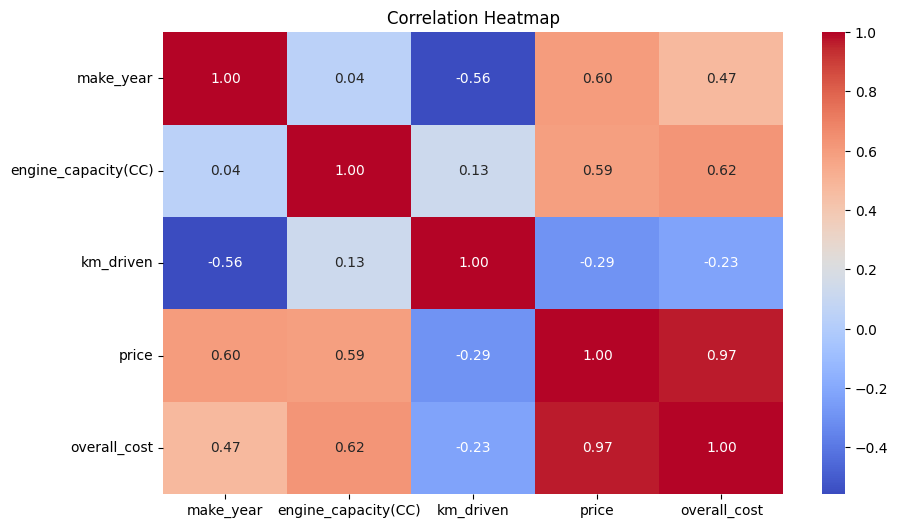

In [6]:
#correlatiion matrix
numerical_data = data.select_dtypes(include=[np.number])


if numerical_data.shape[1] > 0:
    
    correlation_matrix = numerical_data.corr()
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("No numerical columns available for correlation.")

In [12]:
# Convert all numerical columns to the correct type (if necessary)
numerical_data = data.select_dtypes(include=[np.number])
data[numerical_data.columns] = numerical_data.apply(pd.to_numeric, errors='coerce')

# Fill missing values with the median for numerical columns
data[numerical_data.columns] = data[numerical_data.columns].fillna(data[numerical_data.columns].median())

# Re-check missing values
print("\nMissing Values after filling:")
print(data.isnull().sum())


Missing Values after filling:
brand                     1
model                     1
transmission              1
make_year                 0
reg_year               2086
fuel_type                 1
engine_capacity(CC)       0
km_driven                 0
ownership                 1
price                     0
overall_cost              0
has_insurance             1
spare_key                 1
reg_number                1
title                     1
dtype: int64
